## Dogs-vs-Cats Classification

We will use 2013 Kaggle competetion dataset here. The original dataset contains 25K images (12500 imgs of each class)
But for our case we will use only 4000 total images. The split will be as below
> 2000 images for training
    1000 = Dog images
    1000 = Cat images

> 1000 images for Validation
    500 = Dog images
    500 = Cat images

> 1000 images for testing
    500 = Dog images
    500 = Cat images

### Data Handelling

In [29]:
import os, shutil
#Original dataset
original_dataset_dir = 'C:/Users/522817/Downloads/dogs-vs-cats/train/train'
base_dir = 'C:/Users/522817/OneDrive - Cognizant/myWorks/ML/project-dl-book/dog-vs-cat/smaller_dataset'
os.mkdir(base_dir)

In [3]:
# Directories for Train, Validation and Test setup
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [4]:
#Separate the train data with respect to calsses
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train_dir, 'dog')
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

In [5]:
#Separate the validation data with respect to calsses
val_cats_dir = os.path.join(validation_dir, 'cat')
val_dogs_dir = os.path.join(validation_dir, 'dog')
os.mkdir(val_cats_dir)
os.mkdir(val_dogs_dir)

In [6]:
#Separate the train data with respect to calsses
test_cats_dir = os.path.join(test_dir, 'cat')
test_dogs_dir = os.path.join(test_dir, 'dog')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [34]:
def img_copy(class_name, dest_dir, counts1, counts2):
    fnames = [f'{class_name}.{i}.jpg' for i in range(counts1, counts2)]
    for fname in fnames:
        source = os.path.join(original_dataset_dir, fname)
        destination = os.path.join(dest_dir, fname)
        shutil.copyfile(source, destination)

In [35]:
img_copy('cat', train_cats_dir, 0, 1000) # 1000 cat imgs to train cat folder
img_copy('dog', train_dogs_dir, 0, 1000) # 1000 dog imgs to train cat folder
img_copy('cat', val_cats_dir, 1000, 1500) # 500 dog imgs to val cat folder
img_copy('dog', val_dogs_dir, 1000, 1500) # 500 dog imgs to val cat folder
img_copy('cat', test_cats_dir, 1500, 2000) # 500 dog imgs to test cat folder
img_copy('dog', test_dogs_dir, 1500, 2000) # 500 dog imgs t- test dogs folder

In [36]:
# Sanity checks
print(f"Total training cat images: {len(os.listdir(train_cats_dir))}")
print(f"Total validation cat images: {len(os.listdir(val_cats_dir))}")
print(f"Total test cat images: {len(os.listdir(test_cats_dir))}")
print()
print(f"Total training dog images: {len(os.listdir(train_dogs_dir))}")
print(f"Total validation dog images: {len(os.listdir(val_dogs_dir))}")
print(f"Total test dog images: {len(os.listdir(test_dogs_dir))}")

Total training cat images: 1000
Total validation cat images: 500
Total test cat images: 500

Total training dog images: 1000
Total validation dog images: 500
Total test dog images: 500


Each split contains the same number of sampbles from each class hence it is a balanced dataset classification problem which menas classification accuracy will be a accurate measure of success.

### Building the network

### Instantiating a small convent for dogs vs. cats classification

In [40]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Configuring the model

In [43]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### Data preprocessing

Currenlty data sit in the hard drive with jpeg format & it needs to be preprocessed floating point tensors before being fed to network. So the rough steps we will follow

1) Read the picture files

2) Decode the jpeg content to RGB grids of pixels

3) Convert these into floating point tensors

4) Rescale the pixel values(between 0 to 255) to the [0,1] intervals as neural prefer to deal with smaller uniform values

### Using ImageDataGenerator to read images from directories

It creates a python generator that can automatically turn image files in harddrive into batches of preprocessed tensors.

In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
# As we have a binary classification problem ehnce use class mode binary
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [46]:
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    target_size=(150,150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 1000 images belonging to 2 classes.


Lets look to one of the generator output

In [47]:
for data_batch, labels_batch in train_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20,)


Here generators producing the batch of images where each batch contains 20 images and each image size of 150x150x3
We use break because Generators produce the output indefinetly.

### Fitting the model using batch generator

In [48]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

c:\users\522817\onedrive - cognizant\myworks\ml\project-dl-book\dog-vs-cat\envs\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 142s 1s/step - loss: 0.6959 - acc: 0.5080 - val_loss: 0.6920 - val_acc: 0.5120
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.6926 - acc: 0.4980 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 120s 1s/step - loss: 0.6898 - acc: 0.5225 - val_loss: 0.6859 - val_acc: 0.5580
Epoch 4/30
100/100 [==============================] - 118s 1s/step - loss: 0.6861 - acc: 0.5665 - val_loss: 0.6836 - val_acc: 0.5670
Epoch 5/30
100/100 [==============================] - 116s 1s/step - loss: 0.6713 - acc: 0.6050 - val_loss: 0.6647 - val_acc: 0.6030
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.6516 - acc: 0.6335 - val_loss: 0.6639 - val_acc: 0.6010
Epoch 7/30
100/100 [==============================] - 116s 1s/step - loss: 0.6072 - acc: 0.6715 - val_loss: 0.6350 - val_acc: 0.6270
Epoch 8/30
100/100 [==============================] - 109s 1s/step - 

In [49]:
# Saving the model
model.save('cats_and_dogs_small_1.h5')

### Plotting the Training Loss and accuracy

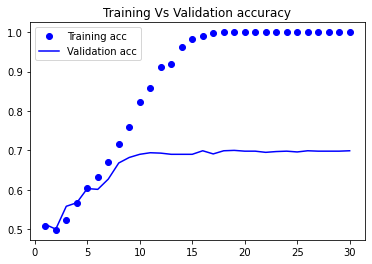

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training Vs Validation accuracy')
plt.legend()
plt.show()


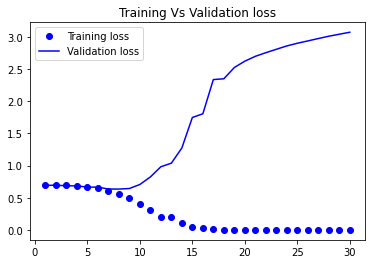

In [54]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()
plt.show()

Observation: 
Its overfitting because we have relatively smll samples(2000). We know to mitigate overfitting we can use techniques like

1) L1 or L2 Regularisation

2) Increase the no of samples

But here we are going to use a new one specific to compute vision an almost used universally when processing images with deep learning models that is `Data Augmentation`

### Setting up a data augmentation configuration via ImageDataGenerator

In [55]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True,
                            fill_mode='nearest')

### Displaying some randomly augmented training images

In [58]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [59]:
# Choosing one image to augment
img_path = fnames[3]
img_path

'./smaller_dataset/train\\cat\\cat.100.jpg'

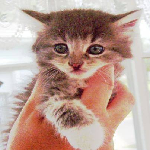

In [60]:
# Read the image & resize it
img = image.load_img(img_path, target_size=(150, 150))
img

In [62]:
# Convert it into a numpy array of shape 150, 150 3
x = image.img_to_array(img)
# x.shape = (150, 150, 3)
x = x.reshape((1,) + x.shape)
# x.shape = (1, 150, 150, 3)

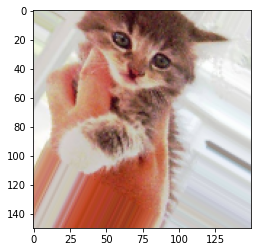

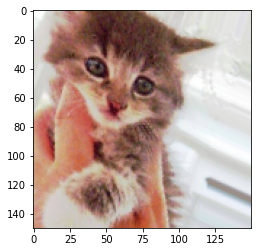

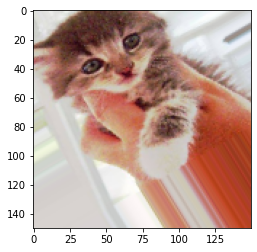

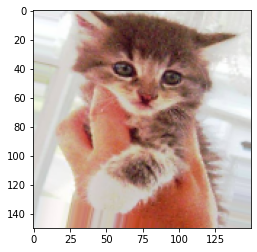

In [65]:
# Generte batches of randomly transformed images. Loops indefinitely, so you need to break the loop at some point
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1 
    if i % 4 == 0:
        break
plt.show()

Although we are augumneting but the images are highly coorelated so only augmentation can not control the overfitting, we need to add drop out to network just before the dense layer.

### Defining a new convnet that includes dropout

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### Training with data augmented generator

In [72]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True)

# The validation data should not be augmeneted
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 97s 965ms/step - loss: 0.6967 - acc: 0.5030 - val_loss: 0.6929 - val_acc: 0.5030
Epoch 2/100
100/100 [==============================] - 85s 852ms/step - loss: 0.6933 - acc: 0.5095 - val_loss: 0.6906 - val_acc: 0.5030
Epoch 3/100
100/100 [==============================] - 95s 954ms/step - loss: 0.6947 - acc: 0.5145 - val_loss: 0.6904 - val_acc: 0.5750
Epoch 4/100
100/100 [==============================] - 94s 943ms/step - loss: 0.6937 - acc: 0.5135 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 5/100
100/100 [==============================] - 93s 927ms/step - loss: 0.6932 - acc: 0.5185 - val_loss: 0.6954 - val_acc: 0.4990
Epoch 6/100
100/100 [==============================] - 96s 965ms/step - loss: 0.6915 - acc: 0.5115 - val_loss: 0.6834 - val_acc: 0.5060
Epoch 7/100
100/100 [==============================] - 99s 991ms/step - loss: 0.6924 - acc: 0.5270 - val_loss: 0.6902 - val_acc: 0.5010
Epoch 8/100
100/100 [===========================

100/100 [==============================] - 126s 1s/step - loss: 0.4576 - acc: 0.7895 - val_loss: 0.4491 - val_acc: 0.7920
Epoch 62/100
100/100 [==============================] - 126s 1s/step - loss: 0.4558 - acc: 0.7860 - val_loss: 0.4607 - val_acc: 0.7830
Epoch 63/100
100/100 [==============================] - 126s 1s/step - loss: 0.4534 - acc: 0.7960 - val_loss: 0.4343 - val_acc: 0.7940
Epoch 64/100
100/100 [==============================] - 126s 1s/step - loss: 0.4403 - acc: 0.8085 - val_loss: 0.4492 - val_acc: 0.7900
Epoch 65/100
100/100 [==============================] - 124s 1s/step - loss: 0.4453 - acc: 0.7875 - val_loss: 0.4374 - val_acc: 0.7910
Epoch 66/100
100/100 [==============================] - 121s 1s/step - loss: 0.4679 - acc: 0.7745 - val_loss: 0.4574 - val_acc: 0.7850
Epoch 67/100
100/100 [==============================] - 125s 1s/step - loss: 0.4293 - acc: 0.8005 - val_loss: 0.4307 - val_acc: 0.8040
Epoch 68/100
100/100 [==============================] - 126s 1s/step

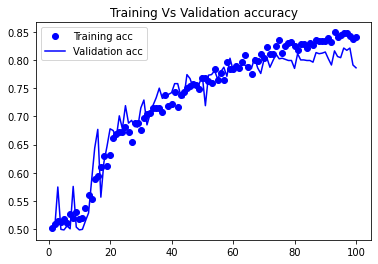

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training Vs Validation accuracy')
plt.legend()
plt.show()

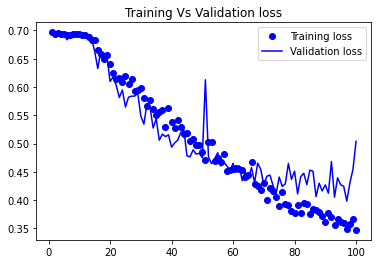

In [75]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()
plt.show()

Observations:
We can see that now over fitting is not happening. The validation plot is followong closely the training plot. By finetuning the model hyperparameters we can improve the performance littlie bit more like 87 to 88% but it will very difficult to improve the performance based only our trining data.

So as a next step to further improve the performance of we will use pretarined models.

In this case lets consider a model which trained on `ImageNet` dataset (1.4 million images with 1000 clases) which has a good collection od dogs and cats imsges hence we can expect theis model to perform well on our dataset. We will use `VGG16` model.

There are some similar models for image classifications like `ResNet`, `Inception`, `Inception-ResNet`,`Xception` and so on.

### Instantiating the VGG16 convolutional base

Lets VGG16 network  trained on ImageNet, to extract interseting features from cat and dog images and then train a dogs-vs-cats classifier on top of these features.

For more on VGG: https://medium.com/@1297rohit/transfer-learning-from-scratch-using-keras-339834b153b9

In [99]:
from keras.applications.vgg16 import VGG16
#We dont want to use the top dense layers of vgg16 which is 1000 classes , we want to use our owm dense layer which is 2 classes
#Hence ww put False for include top parameter

conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150,150,3))

58900480/58889256 [==============================] - 6s 0us/step


In [100]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### Extracting the feature using pretarined convolutional base

In [104]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [103]:
train_dir, validation_dir, test_dir

('./smaller_dataset/train',
 './smaller_dataset/validation',
 './smaller_dataset/test')

In [105]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

In [106]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for input_batch, labels_batch in generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [107]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [109]:
train_features.shape, validation_features.shape, test_features.shape

((2000, 4, 4, 512), (1000, 4, 4, 512), (1000, 4, 4, 512))

In [110]:
train_labels.shape, validation_labels.shape, test_labels.shape

((2000,), (1000,), (1000,))

By passing the images to vgg16 convoltional base we have extacted features of the images and now we will send these features to densely connected classifier and before that we have to flattened them `(samples, 8192)`

In [111]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

#### Defining and training the densely connected classifier

In [119]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=(4*4*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [120]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [121]:
history = model.fit(train_features, 
                    train_labels, 
                    epochs=30, 
                    batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 20ms/step - loss: 0.5206 - acc: 0.7920 - val_loss: 0.2812 - val_acc: 0.8860
Epoch 2/30
100/100 [==============================] - 1s 15ms/step - loss: 0.2609 - acc: 0.8940 - val_loss: 0.2444 - val_acc: 0.9000
Epoch 3/30
100/100 [==============================] - 1s 15ms/step - loss: 0.2066 - acc: 0.9175 - val_loss: 0.2931 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 1s 15ms/step - loss: 0.1887 - acc: 0.9320 - val_loss: 0.2318 - val_acc: 0.9040
Epoch 5/30
100/100 [==============================] - 1s 15ms/step - loss: 0.1408 - acc: 0.9495 - val_loss: 0.2472 - val_acc: 0.8990
Epoch 6/30
100/100 [==============================] - 1s 15ms/step - loss: 0.1205 - acc: 0.9545 - val_loss: 0.2417 - val_acc: 0.9040
Epoch 7/30
100/100 [==============================] - 1s 15ms/step - loss: 0.0962 - acc: 0.9650 - val_loss: 0.2694 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 1s 15ms/step - 

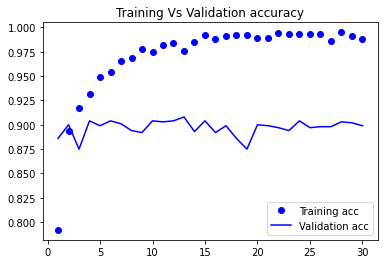

In [123]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training Vs Validation accuracy')
plt.legend()
plt.show()

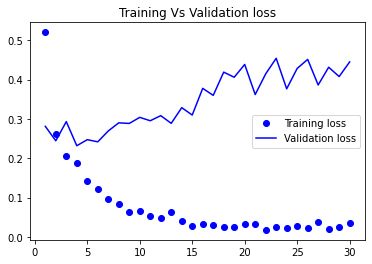

In [124]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()
plt.show()

Observations:-
1) We are getting a validation accuravcy of 90% which is more than previous model

2) But plots indicating we are overfitting at start itself despite using high value of dropout

3) The reason for overfitting is this technique not using data augmentation which is crucial to prevent overfitting on a small image dataset.

### Feature Extraction with Data Augmentation

Use this approach only if you have access to GPU. Its absolutely intractable on CPU.

Because models behave just like layers, we can add a model to a `Sequential` model just like you would add a layer.

#### Adding a densely connected classifier on top of the convolutional base

In [127]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [128]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


We need to freeze the vgg16 layers as during training its weights will get updated causing the loss of the representaions this model learned.

In Keras we freeze a network by setting its `trainbale` attribute to False

In [129]:
print(f'This is the number of trainable weights before freezing the convolutional base: {len(model.trainable_weights)}')

This is the number of trainable weights before freezing the convolutional base: 30


In [130]:
conv_base.trainable = False

In [131]:
print(f'This is the number of trainable weights after freezing the convolutional base: {len(model.trainable_weights)}')

This is the number of trainable weights after freezing the convolutional base: 4


This 4 is poinitng to only weights prsent in two dense layers we added as classifier. That's total of four weight tensors: 2 per layer

Each layer has one tensor for weights and one tensor for bias vecort

#### Training the model end to end with a frozen convolutional base

CAUTION : Run the below cell only if you have GPU enabled

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# The validation data should not be augmeneted
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

## Commented to avoid without GPU run mistake 
#history = model.fit_generator(train_generator, 
#                              steps_per_epoch=100, 
#                              epochs=30, 
#                              validation_data=validation_generator,
#                              validation_steps=50)

### Fine Tuning

Its the process of unfreezing top layer of base network after the Dense layer of the classifier trained and fully train the model ened to end.

In [132]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Unfreezing the top layer meanse the convolution layers in `block5`.

means we will retrain the `block5_conv1`, `block5_conv2`, `block5_conv3`

In [133]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [136]:
# Fine tuning the model
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.0001),
             metrics=['acc'])

In [137]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

c:\users\522817\onedrive - cognizant\myworks\ml\project-dl-book\dog-vs-cat\envs\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 492s 5s/step - loss: 0.4472 - acc: 0.7775 - val_loss: 0.3032 - val_acc: 0.8790
Epoch 2/100
100/100 [==============================] - 511s 5s/step - loss: 0.2948 - acc: 0.8775 - val_loss: 0.1836 - val_acc: 0.9220
Epoch 3/100
100/100 [==============================] - 498s 5s/step - loss: 0.2499 - acc: 0.8940 - val_loss: 0.1884 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 496s 5s/step - loss: 0.2294 - acc: 0.9020 - val_loss: 0.1752 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 483s 5s/step - loss: 0.1782 - acc: 0.9225 - val_loss: 0.1558 - val_acc: 0.9320
Epoch 6/100
100/100 [==============================] - 507s 5s/step - loss: 0.1801 - acc: 0.9230 - val_loss: 0.1616 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 490s 5s/step - loss: 0.1554 - acc: 0.9385 - val_loss: 0.1734 - val_acc: 0.9280
Epoch 8/100
100/100 [==============================] - 503s 5s

Epoch 62/100
100/100 [==============================] - 499s 5s/step - loss: 0.0224 - acc: 0.9925 - val_loss: 0.2983 - val_acc: 0.9350
Epoch 63/100
100/100 [==============================] - 504s 5s/step - loss: 0.0340 - acc: 0.9890 - val_loss: 0.2354 - val_acc: 0.9370
Epoch 64/100
100/100 [==============================] - 511s 5s/step - loss: 0.0172 - acc: 0.9940 - val_loss: 0.3010 - val_acc: 0.9380
Epoch 65/100
100/100 [==============================] - 517s 5s/step - loss: 0.0191 - acc: 0.9940 - val_loss: 0.3169 - val_acc: 0.9250
Epoch 66/100
100/100 [==============================] - 503s 5s/step - loss: 0.0168 - acc: 0.9940 - val_loss: 0.4047 - val_acc: 0.9260
Epoch 67/100
100/100 [==============================] - 504s 5s/step - loss: 0.0240 - acc: 0.9905 - val_loss: 0.3045 - val_acc: 0.9340
Epoch 68/100
100/100 [==============================] - 504s 5s/step - loss: 0.0212 - acc: 0.9910 - val_loss: 0.3046 - val_acc: 0.9360
Epoch 69/100
100/100 [==============================] -

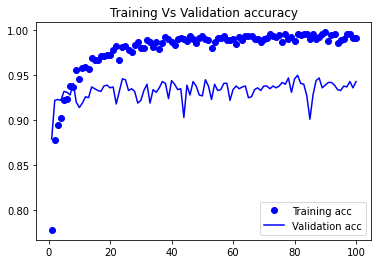

In [138]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training Vs Validation accuracy')
plt.legend()
plt.show()

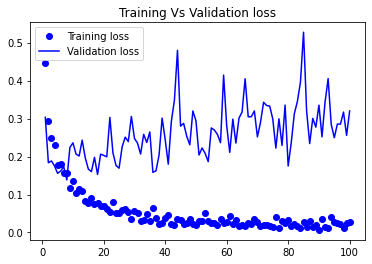

In [139]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()
plt.show()

#### Smoothening the plot

In [140]:
def smooth_curve(points, factor=0.8):
    smoothed_point=[]
    for point in points:
        if smoothed_point:
            previous = smoothed_point[-1]
            smoothed_point.append(previous * factor + point * (1 - factor))
        else:
            smoothed_point.append(point)
    return smoothed_point

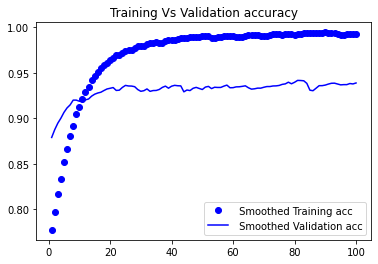

In [142]:
plt.plot(epochs, smooth_curve(acc), 'bo', label=' Smoothed Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label=' Smoothed Validation acc')
plt.title('Training Vs Validation accuracy')
plt.legend()
plt.show()

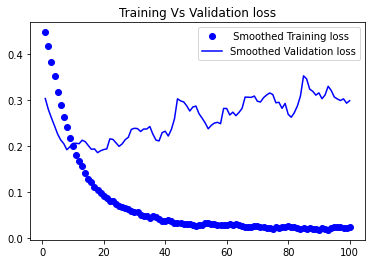

In [143]:
plt.plot(epochs, smooth_curve(loss), 'bo', label=' Smoothed Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()
plt.show()

### Evaluating on Test data

In [145]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print(f"Test accuracy: {test_acc}")

Found 1000 images belonging to 2 classes.


c:\users\522817\onedrive - cognizant\myworks\ml\project-dl-book\dog-vs-cat\envs\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy: 0.9449999928474426


In [146]:
model.save('cats_and_dogs_small_vgg16_tuned.h5')

#### Takeaway points

1) Conv nets are best ML model for computer vision

2) Data augmentaion is a powerful tool to tackle overfitting problem in computer vision problem

3) When working with small datasets feature extraction technique is very useful to improve the performance using a pretrained model.

4) We can also use the Tuning technique as a complement to feature extraction.